## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [38]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

def newton_set1(a = 0,b = 0,c = 0, z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    d = (b**2) - (4*a*c)  
    if d >= 0:
      r1 = (-b-math.sqrt(d))/(2*a)  
      r2 = (-b+math.sqrt(d))/(2*a)  
    else:
      r1 = complex(-b/(2*a), -math.sqrt(-d)/(2*a))
      r2 = complex(-b/(2*a),math.sqrt(-d)/(2*a))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1( a = 0,b = 0,c =0,z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(a,b,c,z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


Punto 1

Text(0, 0.5, 'f(x)')

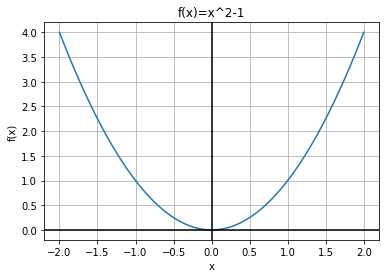

In [21]:
import numpy as np
def f11(z):
    return z ** 2
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f11(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')




Text(0, 0.5, 'f(x)')

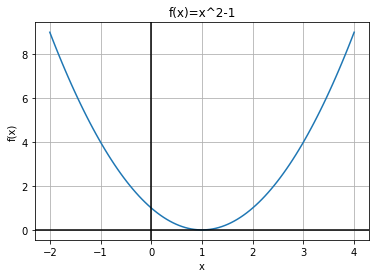

In [22]:
import numpy as np
def f12(z):
    return (z - 1)** 2
x = np.linspace(-2.0,4.0,100)
fig, ax = plt.subplots()
ax.plot(x,f12(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

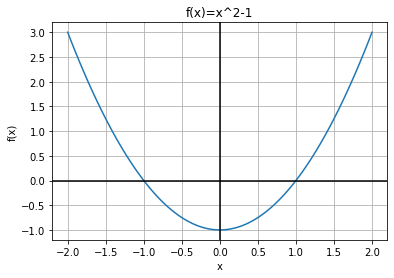

In [23]:
import numpy as np
def f13(z):
    return z** 2 - 1
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f13(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

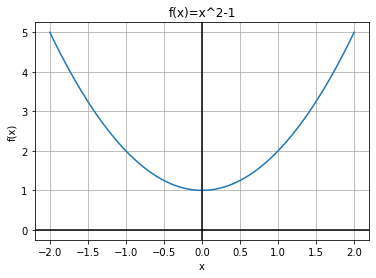

In [24]:
import numpy as np
def f13(z):
    return z** 2 + 1
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f13(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')

Punto 2


In [ ]:
import math
def classic(a, b,c):
  d = (b**2) - (4*a*c)  
  if d >= 0:
    x1 = (-b-math.sqrt(d))/(2*a)  
    x2 = (-b+math.sqrt(d))/(2*a)  
    print('Soluciones {0}, {1}'.format(x1, x2) ) 
  else:
    i1 = str(-b/(2*a)) + "(" + str((-math.sqrt(-d))/(2*a)) + ")i"
    i2 = str(-b/(2*a)) + "(" + str((+math.sqrt(-d))/(2*a)) + ")i"
    print('Soluciones {0}, {1}'.format(i1, i2) ) 

x^2 = 0


In [ ]:
classic(1, 0, 0)

Soluciones 0.0, 0.0


(x-1)^2 = 0, 
x^2 -2x + 1 = 0 

In [ ]:
classic(1, -2, 1)

Soluciones 1.0, 1.0


x^2 – 1 = 0


In [ ]:
classic(1,0,-1)

Soluciones -1.0, 1.0


x^2+ 1 = 0

In [ ]:
classic(1,0,1)

Soluciones 0.0(-1.0)i, 0.0(1.0)i


In [ ]:
import math
def PoShenLoh(a, b,c):
  d = (b/2)**2  - c
  
  if d >= 0:
    u = math.sqrt(d)
    x1 = -b/2 + u 
    x2 = -b/2 - u  
    print('Soluciones {0}, {1}'.format(x1, x2) ) 
  else:
    u = math.sqrt(-d)
    i1 = str(-b/2) + "(" + str(u) + ")i"
    i2 = str(-b/2) + "(" + str(u) + ")i"
    print('Soluciones {0}, {1}'.format(i1, i2) ) 

x^2 = 0

In [ ]:
PoShenLoh(1, 0, 0)

Soluciones 0.0, 0.0


(x-1)^2 = 0, x^2 -2x + 1 = 0

In [ ]:
PoShenLoh(1, -2, 1)

Soluciones 1.0, 1.0


x^2 – 1 = 0

In [ ]:
PoShenLoh(1,0,-1)

Soluciones 1.0, -1.0


x^2+ 1 = 0

In [ ]:
PoShenLoh(1,0,1)

Soluciones 0.0(1.0)i, 0.0(1.0)i


Punto 3


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


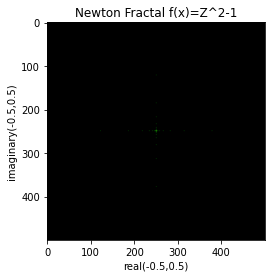

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


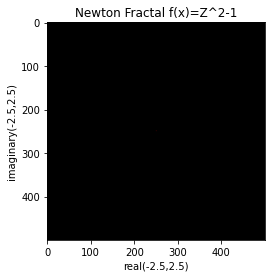

In [32]:
def f(z):
    return z ** 2

def df(z):
    return  2 * z
print("zoom out")
display1(1,0,0,zoom=1)
display1(1,0,0,zoom=5)

Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


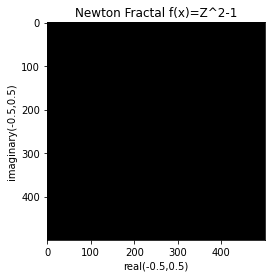

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


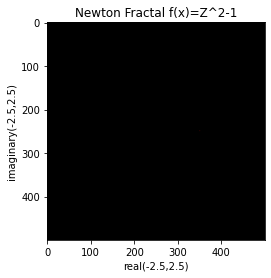

In [33]:
def f(z):
    return (z - 1) ** 2

def df(z):
    return 2 * (z - 1)
display1(1,-2,1,zoom=1)
display1(1,-2,1,zoom=5)

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


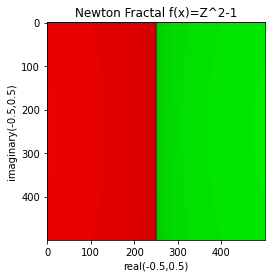

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


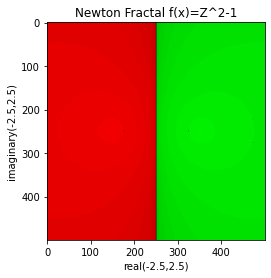

In [34]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z
print("zoom out")
display1(1,0,-1,zoom=1)
display1(1,0,-1,zoom=5)

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


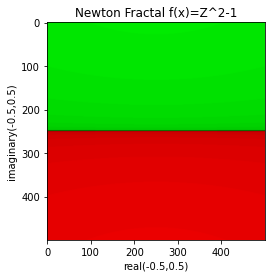

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


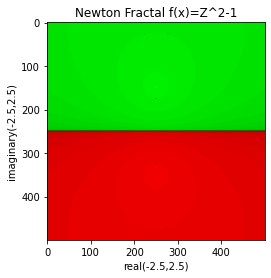

In [39]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z
print("zoom out")
display1(1,0,1,zoom=1)
display1(1,0,1,zoom=5)

Punto 4

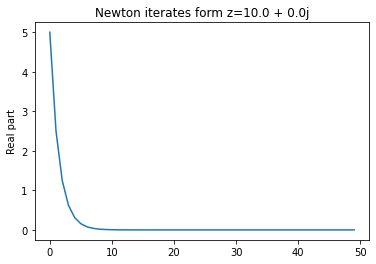

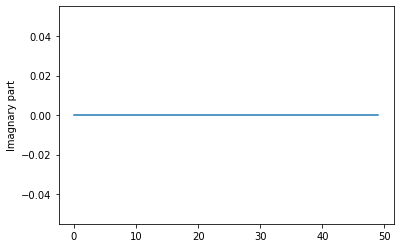

In [40]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

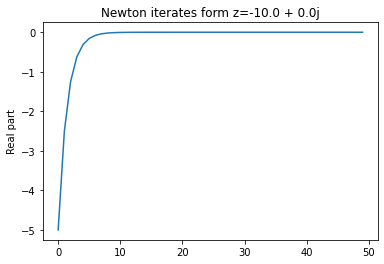

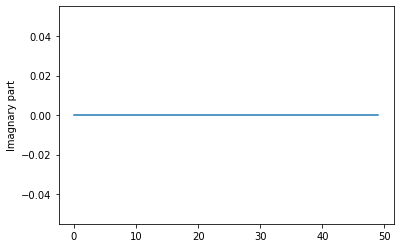

In [71]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

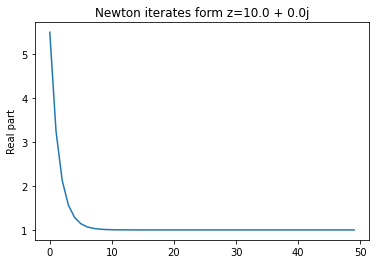

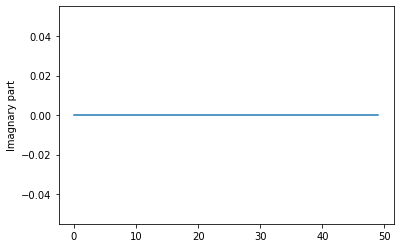

In [42]:
def f(z):
    return (z - 1) ** 2

def df(z):
    return 2 * (z - 1)
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

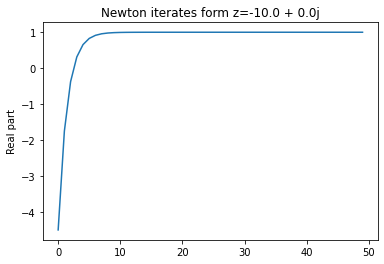

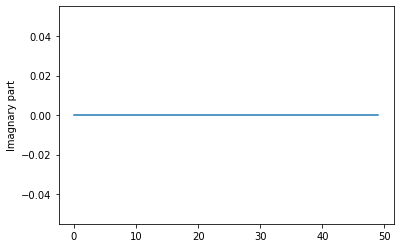

In [72]:
def f(z):
    return (z - 1) ** 2

def df(z):
    return 2 * (z - 1)
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

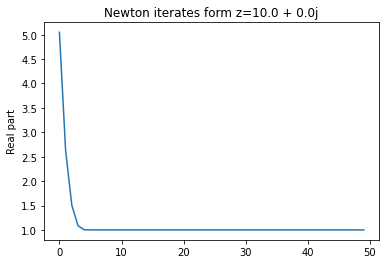

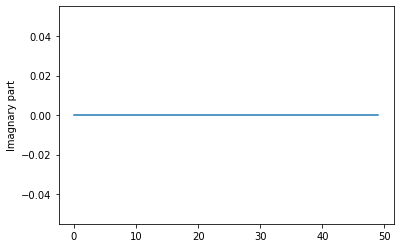

In [44]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

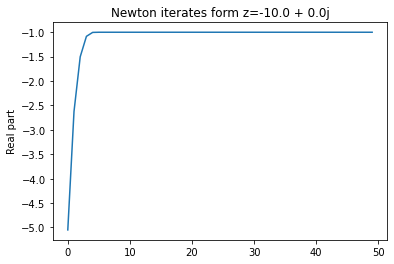

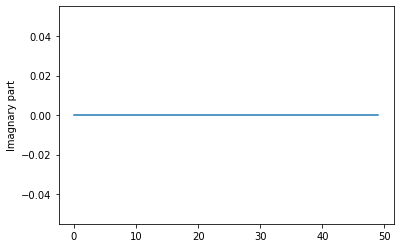

In [73]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

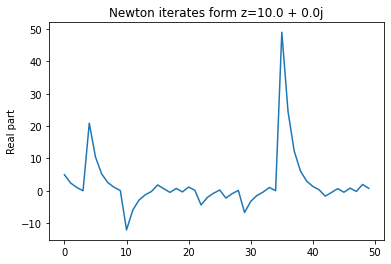

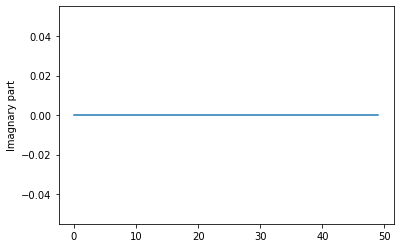

In [46]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

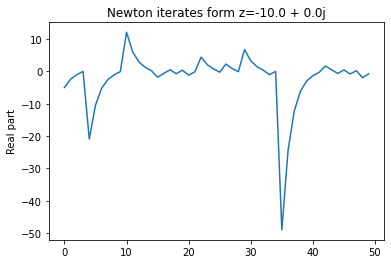

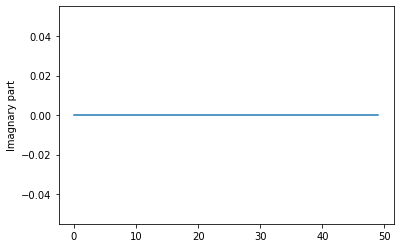

In [74]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

Punto 5


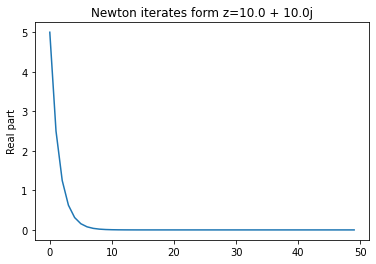

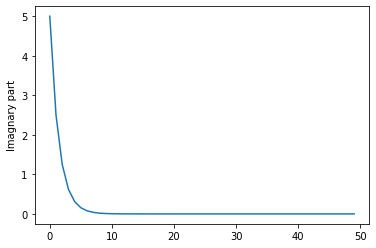

In [50]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z
z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

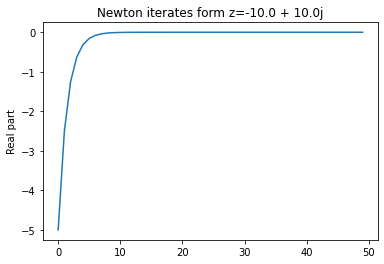

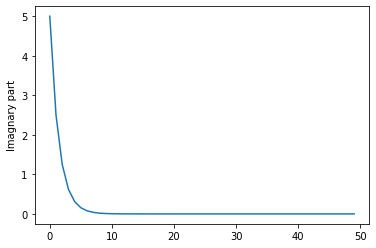

In [51]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

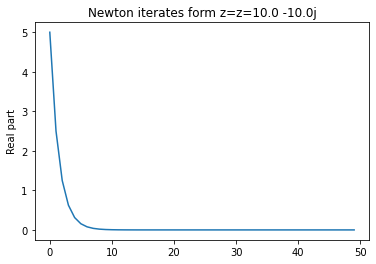

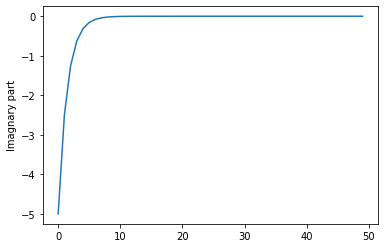

In [52]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z
z=z=10.0  -10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=z=10.0 -10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

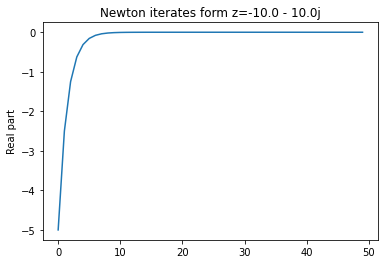

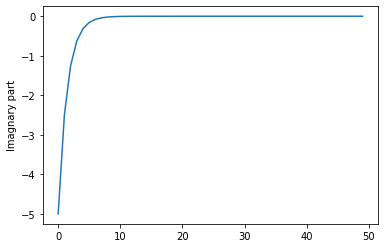

In [53]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z
z=z=-10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

In [54]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z
z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=00.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

ZeroDivisionError: ignored

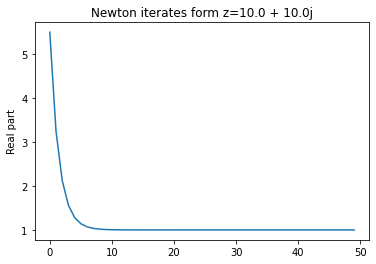

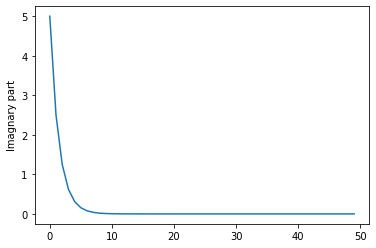

In [56]:
def f(z):
    return (z - 1) ** 2

def df(z):
    return 2 * (z - 1)
z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

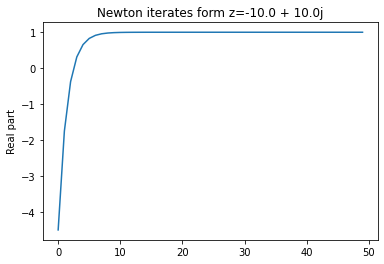

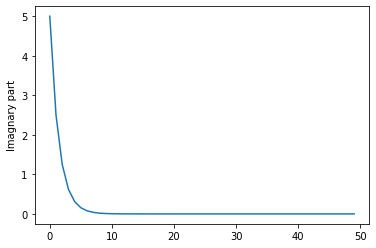

In [57]:
def f(z):
    return (z - 1) ** 2

def df(z):
    return 2 * (z - 1)
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

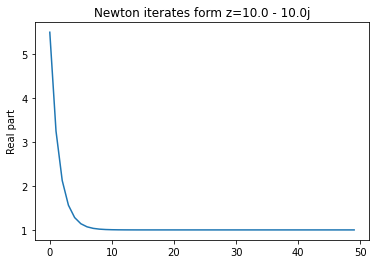

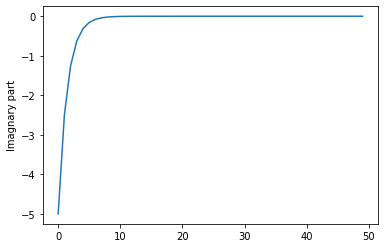

In [58]:
def f(z):
    return (z - 1) ** 2

def df(z):
    return 2 * (z - 1)
z=10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

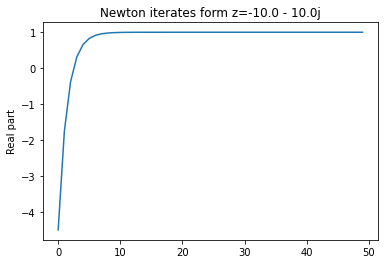

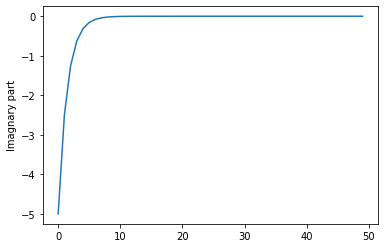

In [59]:
def f(z):
    return (z - 1) ** 2

def df(z):
    return 2 * (z - 1)
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

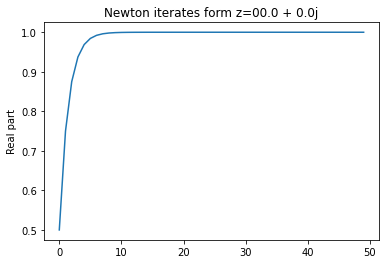

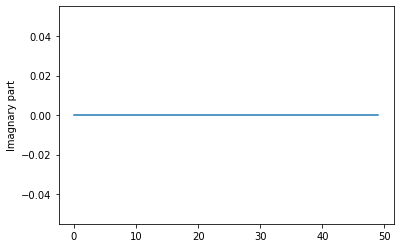

In [60]:
def f(z):
    return (z - 1) ** 2

def df(z):
    return 2 * (z - 1)
z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=00.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

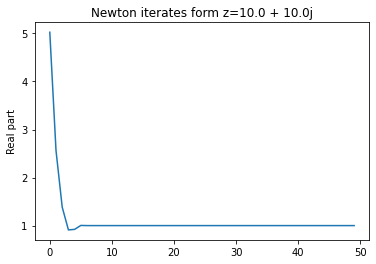

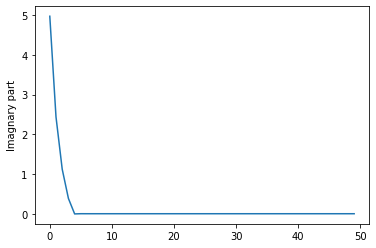

In [61]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z
z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

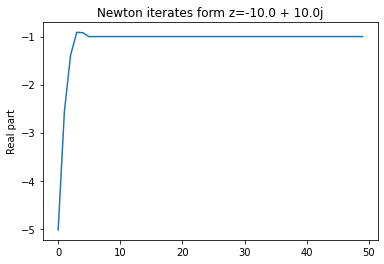

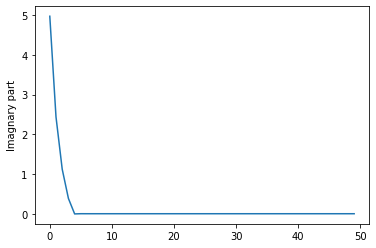

In [62]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

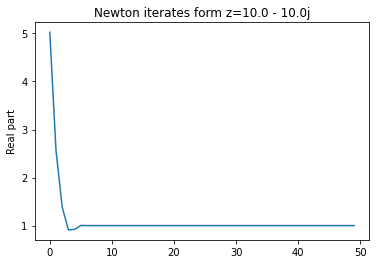

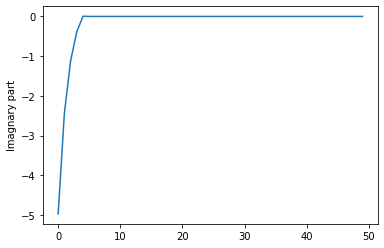

In [63]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z
z=10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

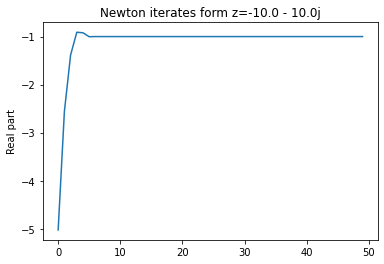

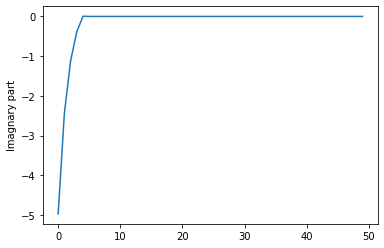

In [64]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

In [65]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z
z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

ZeroDivisionError: ignored

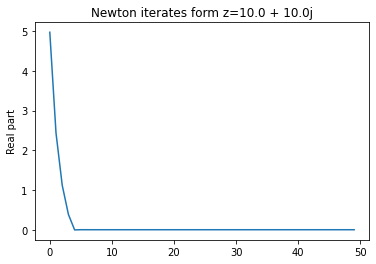

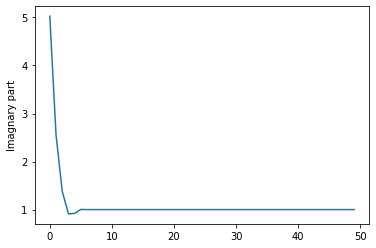

In [66]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z
z=10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

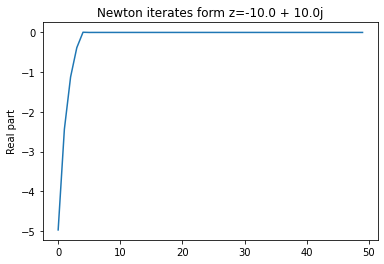

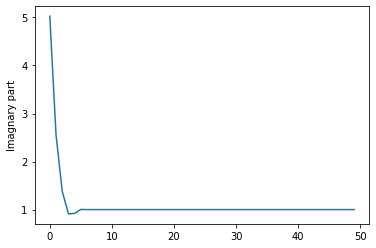

In [67]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

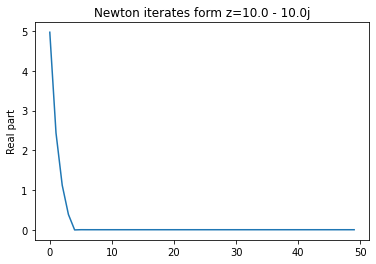

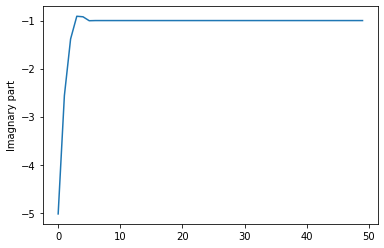

In [68]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z
z=10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

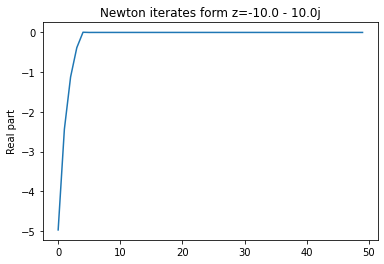

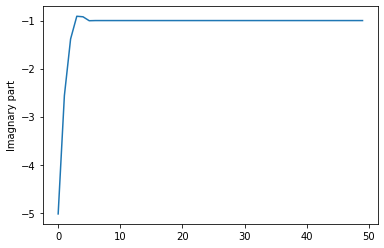

In [69]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

In [70]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z
z=0.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

ZeroDivisionError: ignored